# Import Libraries

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
import pandas as pd

if '../../../notebooks/' not in sys.path:
    sys.path.append('../../../notebooks/')

import utils.constants as cts

from models.oface_mouth_model import OpenfaceMouth
from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from net_trainer import NetworkTrainer, BaseModel, Optimizer

# Start Network Trainer

In [5]:
#req = cts.ICAO_REQ.HAT

kwargs = { 
    'use_neptune': False,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': f'Training network for ALL requisites',
        'tags': ['vgg16', 'ground truths', 'adamax', 'fvc', 'binary_output', 'mtl'],
        'src_files': ['net_trainer.py']
    },
    'properties': {
#         'tagger_model': OpenfaceMouth(),
#         'dl_names': {'train_validation':
#                            [DLName.VGGFACE2, DLName.CALTECH, DLName.FVC_PYBOSSA, 
#                             DLName.CVL, DLName.FEI_DB, DLName.GEORGIA_TECH, DLName.COLOR_FERET,
#                             DLName.ICPR04, DLName.IMFDB, DLName.IJBC, DLName.LFW, DLName.CASIA_WF,
#                             DLName.GENKI4K_DB],
#                       'test': [],
        'reqs': list(cts.ICAO_REQ),
        'aligned': True,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.FVC]
        },
        'balance_input_data': False,
        'save_trained_model': False
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 64,
        'n_epochs': 10,
        'early_stopping': 10,
        'shuffle': True,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'train_prop': 0.9,
        'validation_prop': 0.05,
        'test_prop': 0.05,
        'seed': 42,
        'validation_split': 0.1,
        'dropout': 0.3
    }
}

trainer = NetworkTrainer(**kwargs)

-----
Use Neptune:  False
-----
Args: 
{'exp_params': {'description': 'Training network for ALL requisites',
                'name': 'train_vgg16',
                'src_files': ['net_trainer.py'],
                'tags': ['vgg16',
                         'ground truths',
                         'adamax',
                         'fvc',
                         'binary_output',
                         'mtl']},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7fc0b15e5040>}>,
                      'batch_size': 64,
                      'dropout': 0.3,
                      'early_stopping': 10,
                      'learning_rate': 0.001,
                      'n_epochs': 10,
                      'optimizer': <Optimizer.ADAMAX: 'Adamax'>,
                      'seed': 42,
                      'shuffle': True,
                      'test_prop': 0.05,
                      'train_prop': 0.9,
          

# Load Data

In [6]:
trainer.load_training_data()

Loading data
Loading GT FVC...
..Ignoring 19 empty label values
Input data.shape: (5761, 26)
Data loaded


# Data Balancing

In [7]:
trainer.balance_input_data()

Not balancing input_data


# Data Generators

In [8]:
trainer.setup_data_generators()

Starting data generators
Found 4926 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5761


# Use Neptune

In [9]:
trainer.start_neptune()
trainer.create_experiment()

Not using Neptune
Not using Neptune


# Labels Distribution

# Create Model

In [10]:
trainer.create_model()

Creating model...
Model created


# Vizualize Model

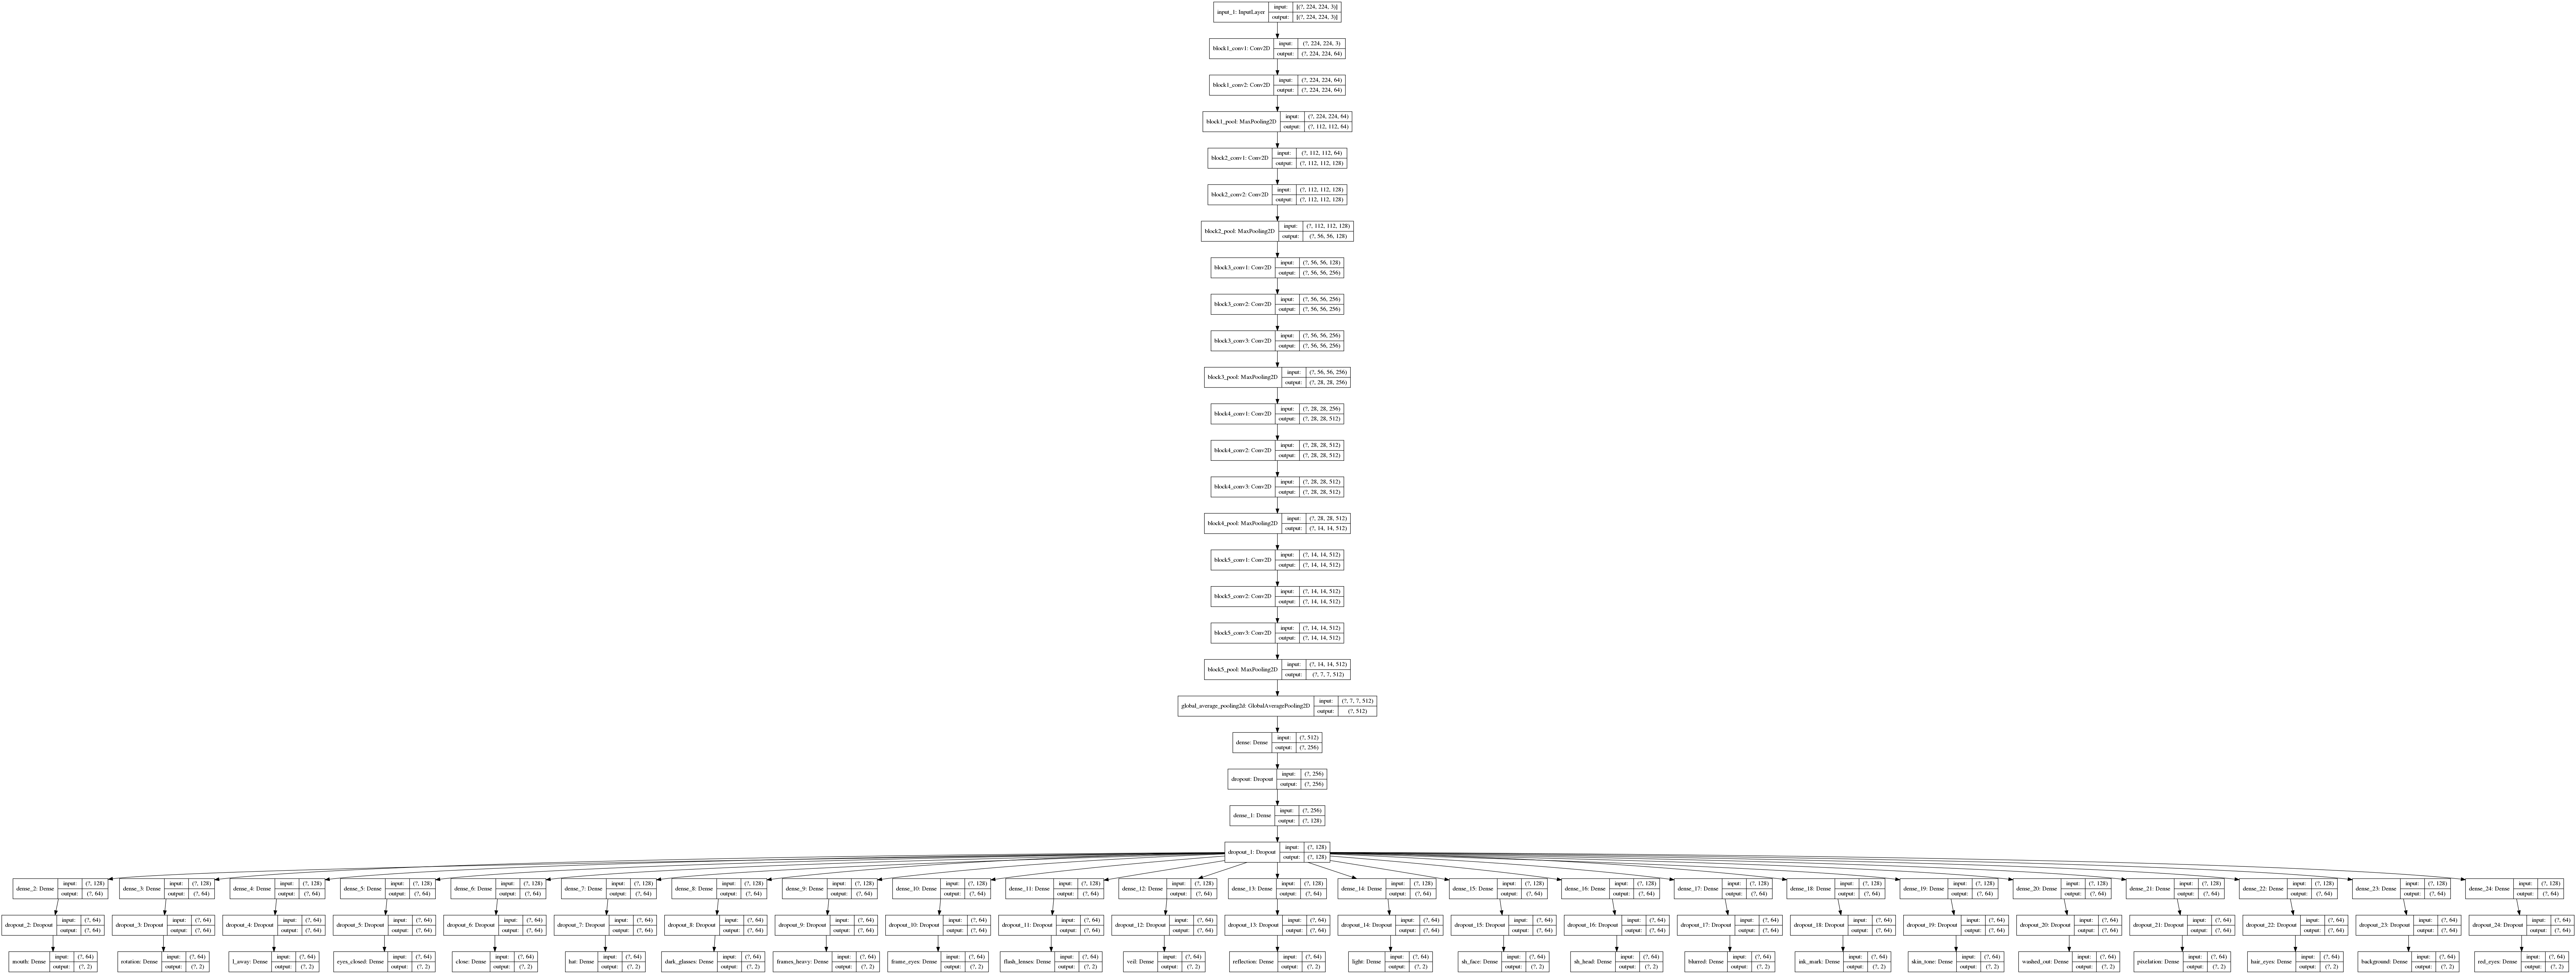

In [11]:
trainer.vizualize_model()

In [ ]:
trainer.model.summary()

# Training Model

In [9]:
trainer.train_model()

Training VGG16 network
Epoch 1/10
76/76 [==============================] - 72s 943ms/step - loss: 1.1831 - mouth_loss: 0.6224 - rotation_loss: 0.6069 - l_away_loss: 0.6514 - eyes_closed_loss: 0.5869 - close_loss: 0.2480 - hat_loss: 0.5227 - dark_glasses_loss: 0.4866 - frames_heavy_loss: 0.2357 - frame_eyes_loss: 0.6428 - flash_lenses_loss: 0.5966 - veil_loss: 0.4015 - reflection_loss: 0.6928 - light_loss: 0.4019 - sh_face_loss: 0.6759 - sh_head_loss: 0.6693 - blurred_loss: 0.4393 - ink_mark_loss: 0.2128 - skin_tone_loss: 0.6890 - washed_out_loss: 0.2439 - pixelation_loss: 0.3882 - hair_eyes_loss: 0.5389 - background_loss: 0.6890 - red_eyes_loss: 0.5885 - mouth_accuracy: 0.7254 - rotation_accuracy: 0.7462 - l_away_accuracy: 0.6828 - eyes_closed_accuracy: 0.7828 - close_accuracy: 0.9770 - hat_accuracy: 0.8420 - dark_glasses_accuracy: 0.8756 - frames_heavy_accuracy: 0.9835 - frame_eyes_accuracy: 0.7046 - flash_lenses_accuracy: 0.7859 - veil_accuracy: 0.9239 - reflection_accuracy: 0.5234 -

# Plots

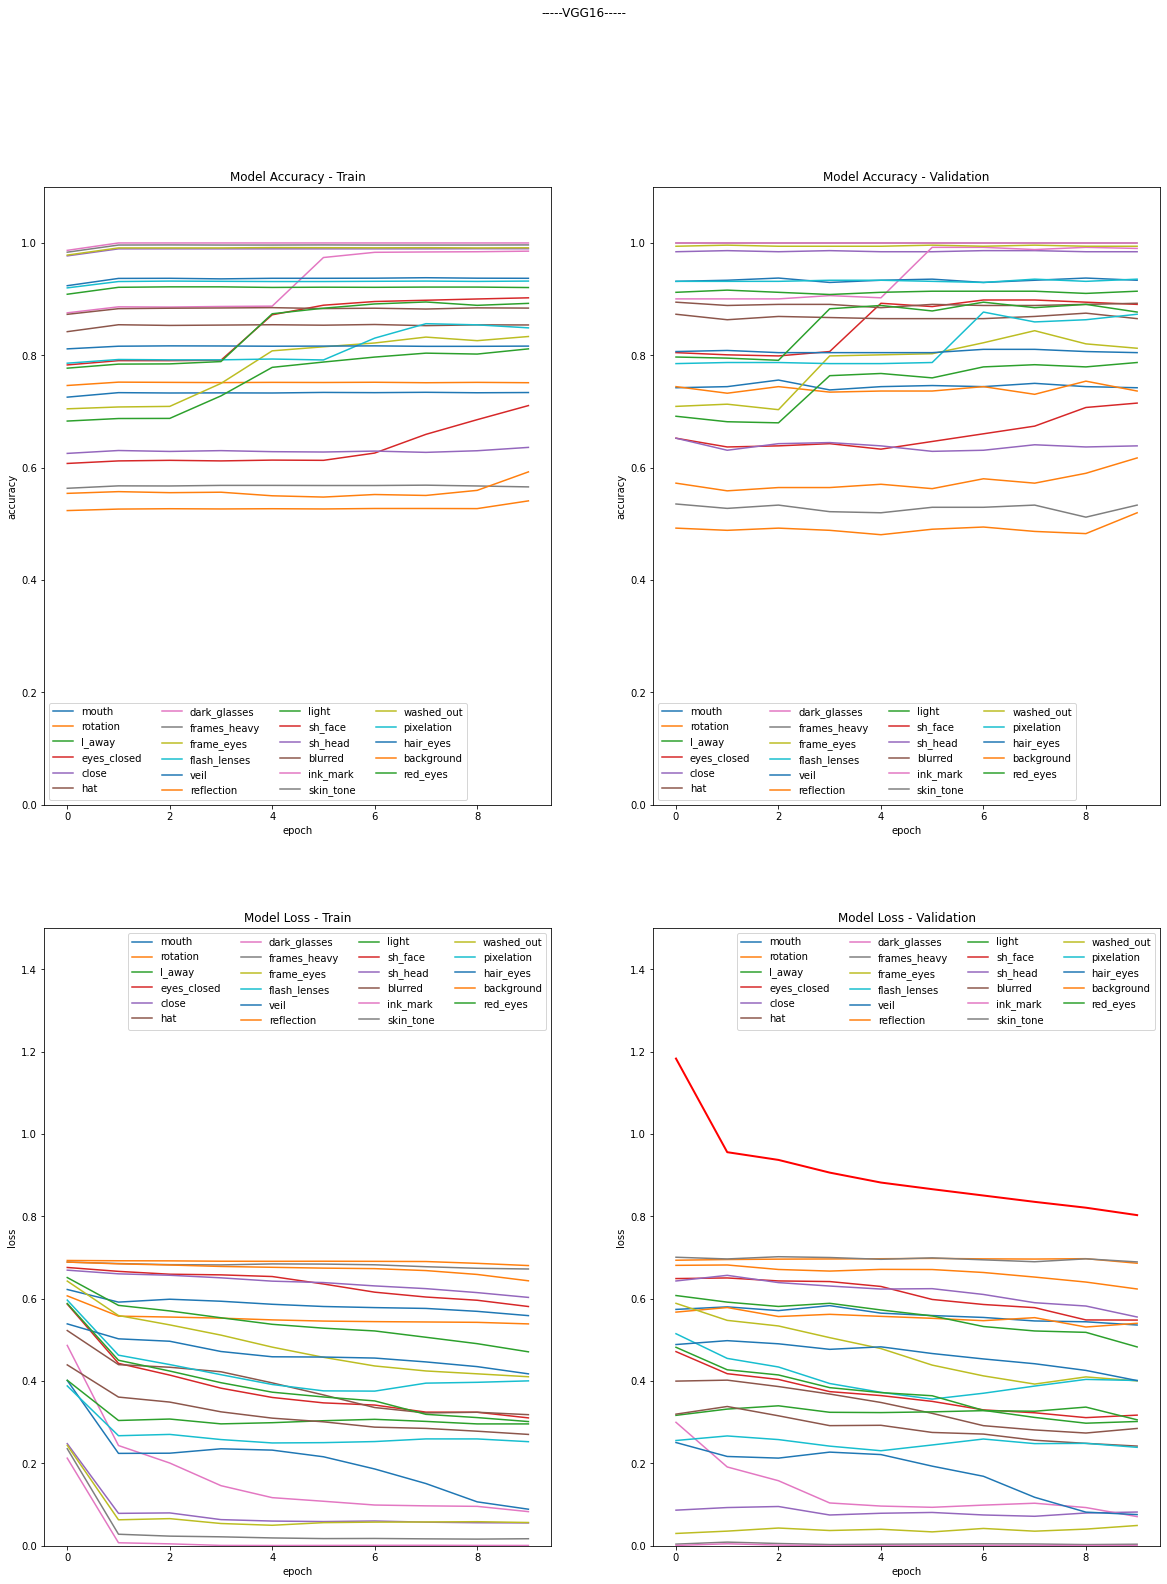

In [10]:
trainer.draw_training_history()

# Load Best Model

In [11]:
trainer.load_best_model()

..Loading checkpoint
..Checkpoint weights loaded


# Saving Trained Model

# Test Trained Model

Testing Trained Model
Requisite: MOUTH
              precision    recall  f1-score   support

    NON_COMP       0.00      0.00      0.00        66
        COMP       0.77      1.00      0.87       222

    accuracy                           0.77       288
   macro avg       0.39      0.50      0.44       288
weighted avg       0.59      0.77      0.67       288

Model Accuracy: 0.7708


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


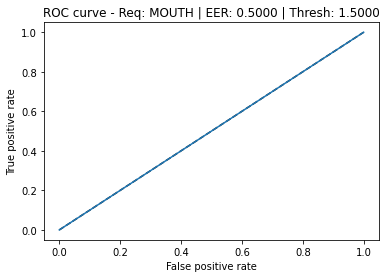

Requisite: ROTATION
              precision    recall  f1-score   support

    NON_COMP       0.00      0.00      0.00        65
        COMP       0.77      1.00      0.87       223

    accuracy                           0.77       288
   macro avg       0.39      0.50      0.44       288
weighted avg       0.60      0.77      0.68       288

Model Accuracy: 0.7743


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


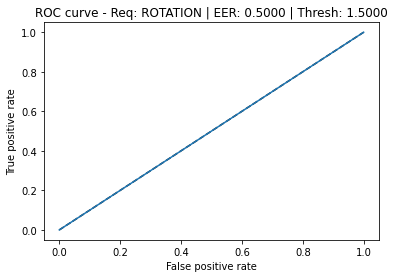

Requisite: L_AWAY
              precision    recall  f1-score   support

    NON_COMP       0.97      0.41      0.58        93
        COMP       0.78      0.99      0.87       195

    accuracy                           0.81       288
   macro avg       0.88      0.70      0.72       288
weighted avg       0.84      0.81      0.78       288

Model Accuracy: 0.8056


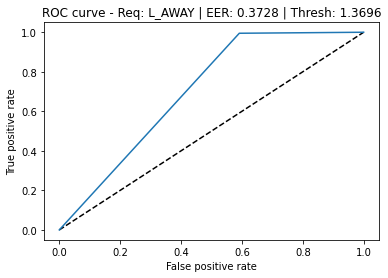

Requisite: EYES_CLOSED
              precision    recall  f1-score   support

    NON_COMP       1.00      0.55      0.71        64
        COMP       0.89      1.00      0.94       224

    accuracy                           0.90       288
   macro avg       0.94      0.77      0.82       288
weighted avg       0.91      0.90      0.89       288

Model Accuracy: 0.8993


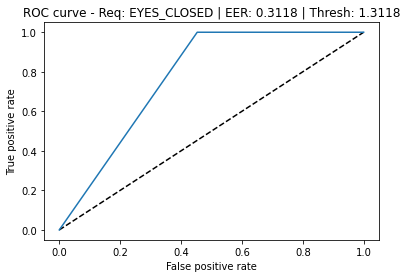

Requisite: CLOSE
              precision    recall  f1-score   support

    NON_COMP       0.00      0.00      0.00         2
        COMP       0.99      1.00      1.00       286

    accuracy                           0.99       288
   macro avg       0.50      0.50      0.50       288
weighted avg       0.99      0.99      0.99       288

Model Accuracy: 0.9931


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


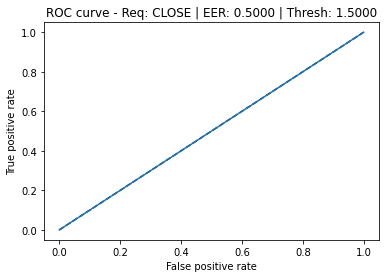

Requisite: HAT
              precision    recall  f1-score   support

    NON_COMP       0.00      0.00      0.00        50
        COMP       0.83      1.00      0.90       238

    accuracy                           0.83       288
   macro avg       0.41      0.50      0.45       288
weighted avg       0.68      0.83      0.75       288

Model Accuracy: 0.8264


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


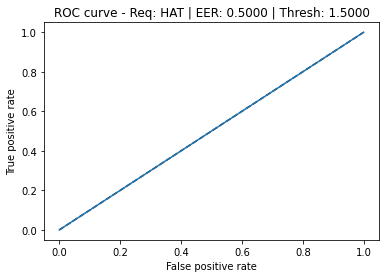

Requisite: DARK_GLASSES
              precision    recall  f1-score   support

    NON_COMP       0.97      0.97      0.97        35
        COMP       1.00      1.00      1.00       253

    accuracy                           0.99       288
   macro avg       0.98      0.98      0.98       288
weighted avg       0.99      0.99      0.99       288

Model Accuracy: 0.9931


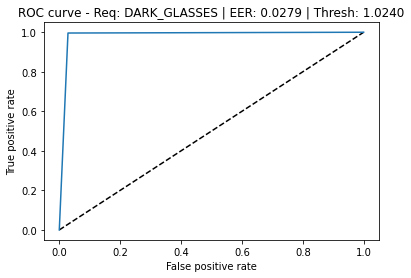

Requisite: FRAMES_HEAVY
              precision    recall  f1-score   support

    NON_COMP       0.00      0.00      0.00         1
        COMP       1.00      1.00      1.00       287

    accuracy                           1.00       288
   macro avg       0.50      0.50      0.50       288
weighted avg       0.99      1.00      0.99       288

Model Accuracy: 0.9965


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


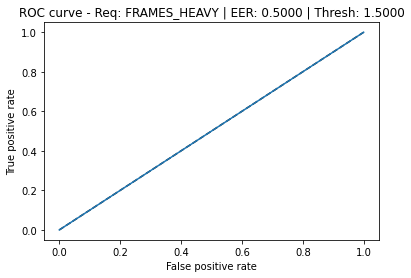

Requisite: FRAME_EYES
              precision    recall  f1-score   support

    NON_COMP       0.87      0.55      0.67        88
        COMP       0.83      0.96      0.89       200

    accuracy                           0.84       288
   macro avg       0.85      0.76      0.78       288
weighted avg       0.84      0.84      0.82       288

Model Accuracy: 0.8368


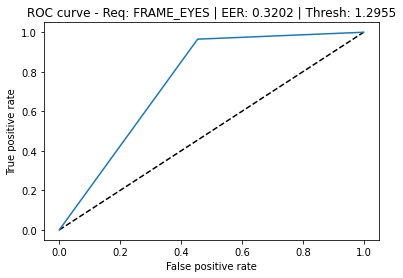

Requisite: FLASH_LENSES
              precision    recall  f1-score   support

    NON_COMP       0.79      0.48      0.60        65
        COMP       0.86      0.96      0.91       223

    accuracy                           0.85       288
   macro avg       0.83      0.72      0.75       288
weighted avg       0.85      0.85      0.84       288

Model Accuracy: 0.8542


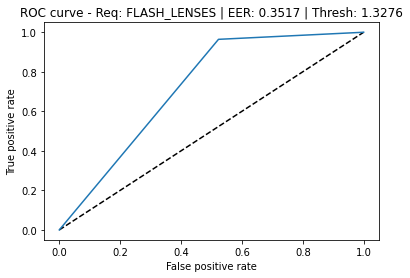

Requisite: VEIL
              precision    recall  f1-score   support

    NON_COMP       0.00      0.00      0.00        17
        COMP       0.94      1.00      0.97       271

    accuracy                           0.94       288
   macro avg       0.47      0.50      0.48       288
weighted avg       0.89      0.94      0.91       288

Model Accuracy: 0.941


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


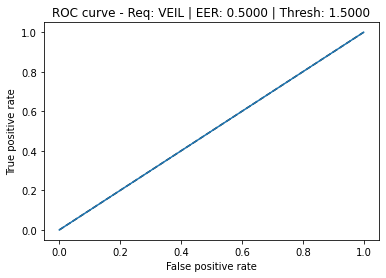

Requisite: REFLECTION
              precision    recall  f1-score   support

    NON_COMP       0.57      0.49      0.53       130
        COMP       0.62      0.69      0.65       158

    accuracy                           0.60       288
   macro avg       0.59      0.59      0.59       288
weighted avg       0.60      0.60      0.60       288

Model Accuracy: 0.6007


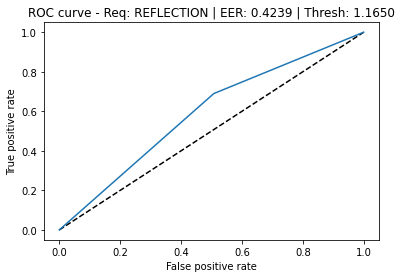

Requisite: LIGHT
              precision    recall  f1-score   support

    NON_COMP       0.00      0.00      0.00        30
        COMP       0.90      1.00      0.95       258

    accuracy                           0.90       288
   macro avg       0.45      0.50      0.47       288
weighted avg       0.80      0.90      0.85       288

Model Accuracy: 0.8958


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


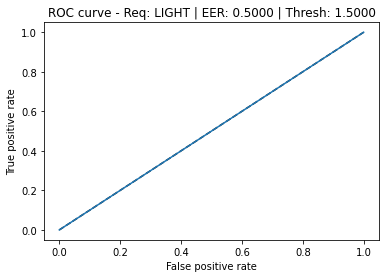

Requisite: SH_FACE
              precision    recall  f1-score   support

    NON_COMP       0.71      0.58      0.64       100
        COMP       0.80      0.87      0.83       188

    accuracy                           0.77       288
   macro avg       0.75      0.73      0.73       288
weighted avg       0.77      0.77      0.76       288

Model Accuracy: 0.7708


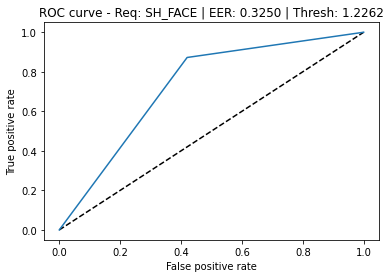

Requisite: SH_HEAD
              precision    recall  f1-score   support

    NON_COMP       0.50      0.01      0.02       107
        COMP       0.63      0.99      0.77       181

    accuracy                           0.63       288
   macro avg       0.56      0.50      0.39       288
weighted avg       0.58      0.63      0.49       288

Model Accuracy: 0.6285


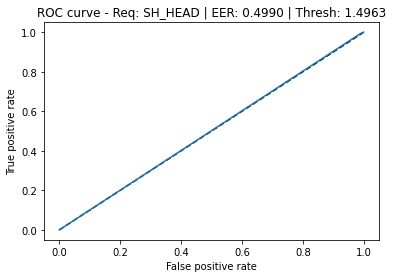

Requisite: BLURRED
              precision    recall  f1-score   support

    NON_COMP       0.00      0.00      0.00        30
        COMP       0.90      1.00      0.95       258

    accuracy                           0.90       288
   macro avg       0.45      0.50      0.47       288
weighted avg       0.80      0.90      0.85       288

Model Accuracy: 0.8958


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


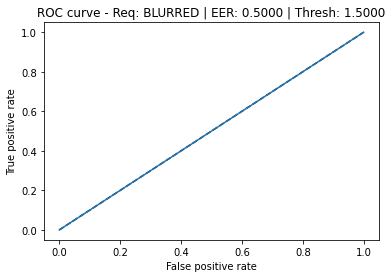

Requisite: SKIN_TONE
              precision    recall  f1-score   support

    NON_COMP       0.00      0.00      0.00       119
        COMP       0.59      1.00      0.74       169

    accuracy                           0.59       288
   macro avg       0.29      0.50      0.37       288
weighted avg       0.34      0.59      0.43       288

Model Accuracy: 0.5868


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


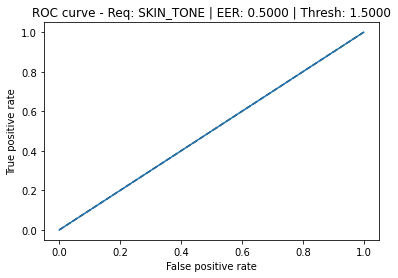

Requisite: WASHED_OUT
              precision    recall  f1-score   support

    NON_COMP       0.00      0.00      0.00         4
        COMP       0.99      1.00      0.99       284

    accuracy                           0.99       288
   macro avg       0.49      0.50      0.50       288
weighted avg       0.97      0.99      0.98       288

Model Accuracy: 0.9861


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


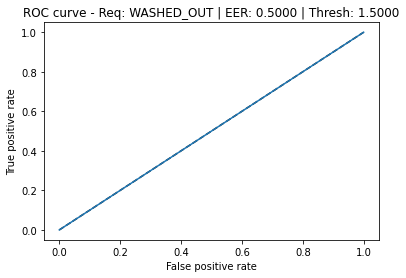

Requisite: PIXELATION
              precision    recall  f1-score   support

    NON_COMP       0.00      0.00      0.00        20
        COMP       0.93      1.00      0.96       268

    accuracy                           0.93       288
   macro avg       0.47      0.50      0.48       288
weighted avg       0.87      0.93      0.90       288

Model Accuracy: 0.9306


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


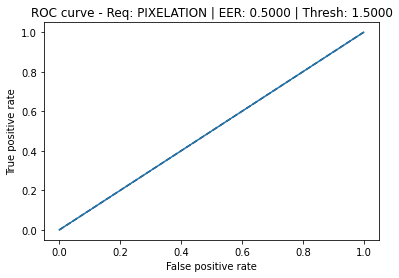

Requisite: HAIR_EYES
              precision    recall  f1-score   support

    NON_COMP       0.00      0.00      0.00        48
        COMP       0.83      1.00      0.91       240

    accuracy                           0.83       288
   macro avg       0.42      0.50      0.45       288
weighted avg       0.69      0.83      0.76       288

Model Accuracy: 0.8333


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


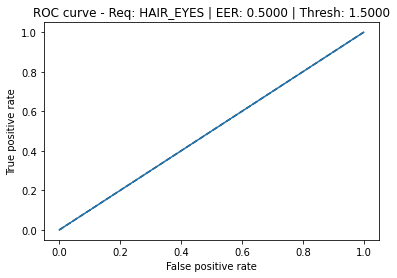

Requisite: BACKGROUND
              precision    recall  f1-score   support

    NON_COMP       0.60      0.45      0.52       130
        COMP       0.62      0.75      0.68       158

    accuracy                           0.61       288
   macro avg       0.61      0.60      0.60       288
weighted avg       0.61      0.61      0.61       288

Model Accuracy: 0.6146


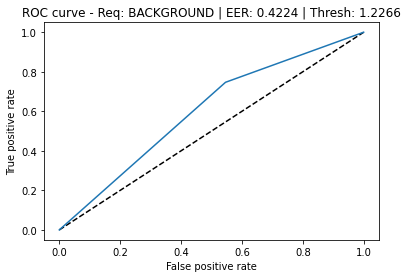

Requisite: RED_EYES
              precision    recall  f1-score   support

    NON_COMP       1.00      0.58      0.73        64
        COMP       0.89      1.00      0.94       224

    accuracy                           0.91       288
   macro avg       0.95      0.79      0.84       288
weighted avg       0.92      0.91      0.90       288

Model Accuracy: 0.9062


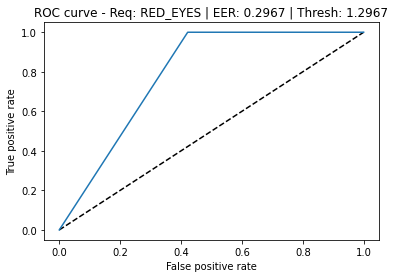

In [15]:
trainer.test_model()

# Evaluate Model

In [16]:
trainer.evaluate_model()

Evaluating model
TEST loss:  0.7892
TEST accuracy:  0.4933


# Vizualize Model Classification

# Finishing Experiment Manager

In [18]:
trainer.finish_experiment()

Finishing Neptune
